<a href="https://colab.research.google.com/github/VoorugondaAnushka/23CSBTB29/blob/main/LabExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#importing datasets


In [2]:
df = pd.read_csv("prostate.csv")
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


#Standadise the variables

In [3]:
from sklearn.preprocessing import StandardScaler
# Changed Target to lowercase to match column name in df
Target = 'gleason'
scaler = StandardScaler()

scaler.fit(df.drop(Target, axis=1))
scaled_features = scaler.transform(df.drop(Target, axis=1))

df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.525657,-0.867655,-0.868957,-2.533318
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.525657,-0.867655,-0.868957,-2.299712
2,-1.587021,-2.200154,1.368234,-1.030029,-0.525657,-0.867655,-0.156155,-2.299712
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.525657,-0.867655,-0.868957,-2.299712
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.525657,-0.867655,-0.868957,-1.834631


#Model Development and Evaluation

In [4]:
from sklearn.metrics import classification_report,\
    confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test,\
    y_train, y_test = train_test_split(scaled_features,
                                       df[Target],
                                       test_size=0.30)

# Remember that we are trying to come up
# with a model to predict whether
# someone will Target or not.
# We'll start with k = 1.

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Predictions and Evaluations
# Let's evaluate our KNN model !
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 7  3  0  0]
 [ 6 11  0  1]
 [ 1  0  0  0]
 [ 0  1  0  0]]
              precision    recall  f1-score   support

           6       0.50      0.70      0.58        10
           7       0.73      0.61      0.67        18
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.60        30
   macro avg       0.31      0.33      0.31        30
weighted avg       0.61      0.60      0.59        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Elbow Method

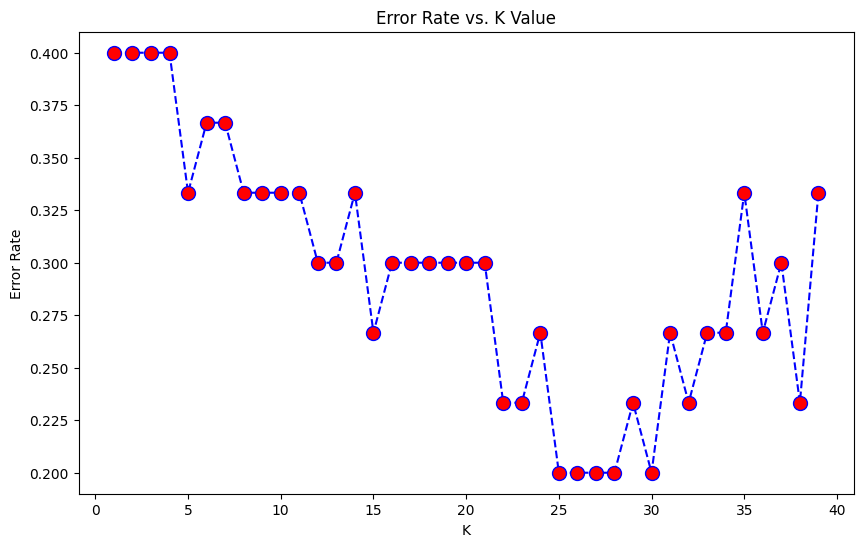

In [5]:
error_rate = []

# Will take some time
for i in range(1, 40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
         linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

#k=1

In [6]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 1')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))

WITH K = 1
Confusion Matrix
[[ 7  3  0  0]
 [ 6 11  0  1]
 [ 1  0  0  0]
 [ 0  1  0  0]]
Classification Report
              precision    recall  f1-score   support

           6       0.50      0.70      0.58        10
           7       0.73      0.61      0.67        18
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.60        30
   macro avg       0.31      0.33      0.31        30
weighted avg       0.61      0.60      0.59        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#k=10


In [8]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 10
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 10')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))

WITH K = 10
Confusion Matrix
[[ 8  2  0  0]
 [ 6 12  0  0]
 [ 0  1  0  0]
 [ 0  1  0  0]]
Classification Report
              precision    recall  f1-score   support

           6       0.57      0.80      0.67        10
           7       0.75      0.67      0.71        18
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.67        30
   macro avg       0.33      0.37      0.34        30
weighted avg       0.64      0.67      0.65        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
